In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

In [126]:
def plot_results(results, titles, dim_range):
    linewidth = 4
    fontsize = 15

    num_plots = len(results)
    plt.figure(figsize=(7 * num_plots, 5))

    for i in range(num_plots):
        ax = plt.subplot(1, num_plots, i + 1)
        arr = results[i]

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth)
        ax.fill_between(dim_range, min_, max_, alpha=0.15)
        
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

        plt.grid()
        plt.ylabel('Sum of rewards for episode', fontsize=fontsize)
        plt.xlabel('episode', fontsize=fontsize)
        plt.title(titles[i], fontsize=fontsize)

In [112]:
cart_pole_results = np.load('results/dqn_environments/cart_pole.npy')

In [113]:
n_seeds, n_episodes = cart_pole_results.shape

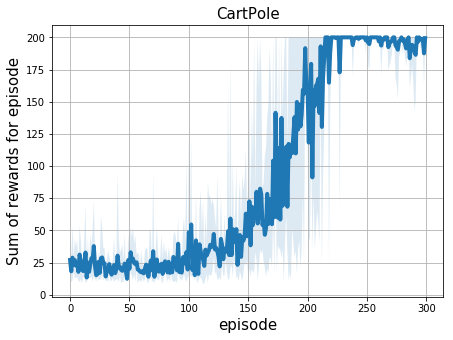

In [114]:
plot_results([cart_pole_results], ['CartPole'], np.arange(n_episodes))

In [115]:
acrobot_results = np.load('results/dqn_environments/acrobot.npy')

In [116]:
n_seeds, n_episodes = acrobot_results.shape

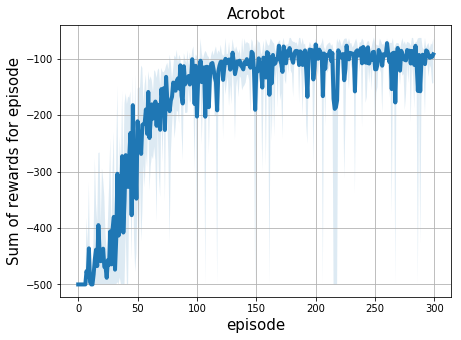

In [117]:
plot_results([acrobot_results], ['Acrobot'], np.arange(n_episodes))

In [118]:
mcar_results = np.load('results/dqn_environments/mountain_car.npy')

In [119]:
n_seeds, n_episodes = mcar_results.shape

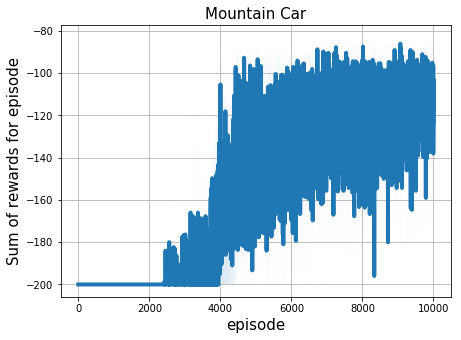

In [127]:
mcar_results = np.load('results/dqn_environments/mountain_car_1.npy')

In [128]:
n_seeds, n_episodes = mcar_results.shape

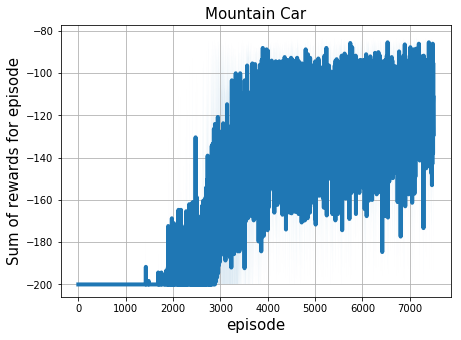

In [129]:
plot_results([mcar_results], ['Mountain Car'], np.arange(n_episodes))

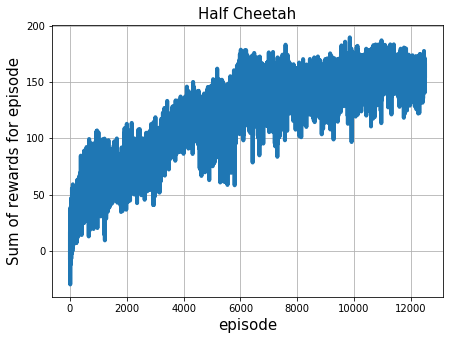

In [121]:
half_cheetah_results = np.load('results/trpo_environments/half_cheetah_rewards.npy')
if len(half_cheetah_results.shape) == 1:
    half_cheetah_results = half_cheetah_results[np.newaxis]
n_seeds, n_episodes = half_cheetah_results.shape
plot_results([half_cheetah_results], ['Half Cheetah'], np.arange(n_episodes))

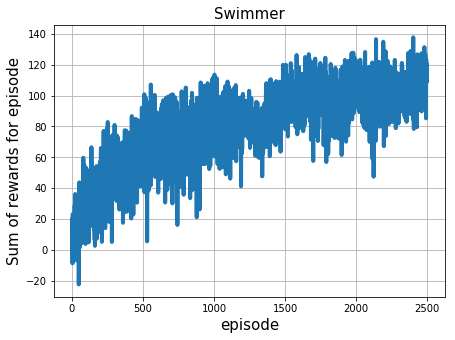

In [122]:
swimmer = np.load('results/trpo_environments/swimmer_rewards.npy')
if len(swimmer.shape) == 1:
    swimmer = swimmer[np.newaxis]
n_seeds, n_episodes = swimmer.shape
plot_results([swimmer], ['Swimmer'], np.arange(n_episodes))

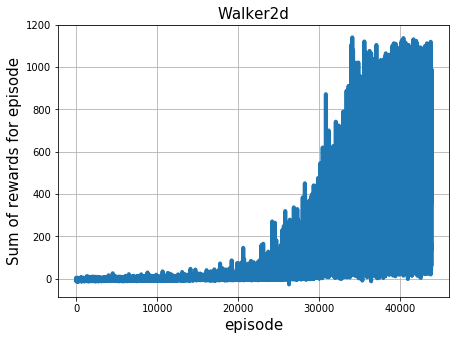

In [123]:
walker = np.load('results/trpo_environments/walker_rewards.npy')
if len(walker.shape) == 1:
    walker = walker[np.newaxis]
n_seeds, n_episodes = walker.shape
plot_results([walker], ['Walker2d'], np.arange(n_episodes))

In [34]:
import gym

In [38]:
env = gym.make('Pendulum-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [39]:
env.action_space

Box(1,)